<a href="https://colab.research.google.com/github/AitorNoel/PontiaProyectoJupiter/blob/main/coches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import io
from google.colab import files
df = pd.read_csv("/content/drive/MyDrive/PONTIA/VISUALIZACION/VISUALIZACION PYTHON/Teorica/coches-de-segunda-mano-sample.csv")
df.head(5)

,Marca,Modelo,Precio,Año,kms,CV,Puertas,Marchas,color,Provincia,Pais
0,CITROEN,C1,6200,2017,50071,82.0,5,Manual,verde,Tenerife,Spain
1,FORD,Transit Connect,7851,2016,103000,100.0,4,Manual,amarillo,Barcelona,Spain
2,VOLKSWAGEN,Caravelle,19426,2014,120000,140.0,4,Manual,gris,Navarra,Spain
3,FORD,Transit,22850,2017,107000,130.0,2,Manual,verde,Sevilla,Spain
4,PEUGEOT,3008,11490,2016,78665,130.0,5,Manual,blanco,Madrid,Spain


In [ ]:
df1 = df.loc[(df.Marca.isin(['VOLKSWAGEN', 'BMW']))&(df.Modelo.isin(['Golf', 'Serie 3']))]
df1['Marca_Modelo'] = df['Marca'] + '_' + df['Modelo']

In [ ]:
df1.head(2)

,Marca,Modelo,Precio,Año,kms,CV,Puertas,Marchas,color,Provincia,Pais,Marca_Modelo
25,BMW,Serie 3,10000,2009,162000,177.0,2,Automatico,blanco,Madrid,Spain,BMW_Serie 3
34,VOLKSWAGEN,Golf,11300,2016,77867,110.0,5,Manual,blanco,Barcelona,Spain,VOLKSWAGEN_Golf


In [ ]:
df_piebar = df1.groupby(by=['Marca_Modelo'], as_index=False) \
       .agg(NumCoches=('Precio', 'size'), Precio_Medio=('Precio', 'mean'))
df_piebar

,Marca_Modelo,NumCoches,Precio_Medio
0,BMW_Serie 3,948,15349.723629
1,VOLKSWAGEN_Golf,1141,13830.801052


array([<Axes: ylabel='NumCoches'>], dtype=object)

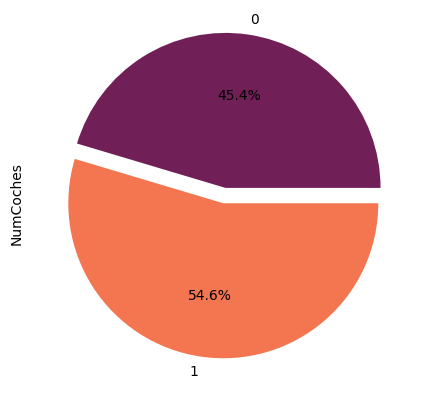

In [ ]:
colors = ['#701f57', '#f37651']
df_piebar['NumCoches'].plot(kind='pie', subplots = True, figsize=(5,10), autopct='%1.1f%%', table=False, colors=colors, explode=[0.1, 0])

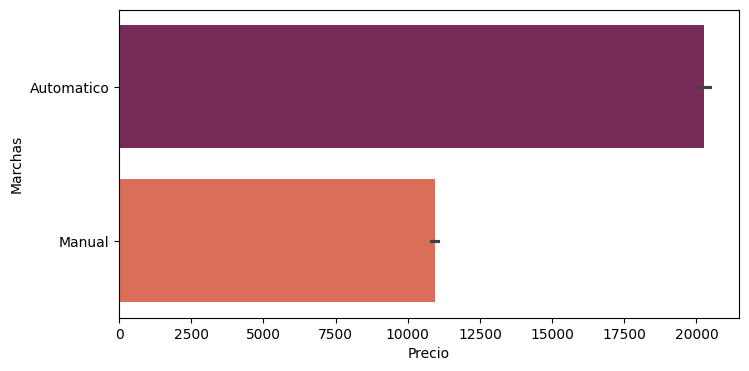

In [ ]:
df_Marchas_Precio = df1.groupby(by=['Marca_Modelo', 'Marchas'], as_index=False)['Precio'].mean()

plt.figure(figsize=(8,4))
sns.barplot(data=df_Marchas_Precio, y='Marchas', x= 'Precio',  palette= 'rocket')
plt.show()

In [ ]:
df_Marchas_Count = df1.groupby(by=['Marca_Modelo', 'Marchas'], as_index=False)['Precio'].count()
df_Marchas_Count

,Marca_Modelo,Marchas,Precio
0,BMW_Serie 3,Automatico,433
1,BMW_Serie 3,Manual,515
2,VOLKSWAGEN_Golf,Automatico,373
3,VOLKSWAGEN_Golf,Manual,768


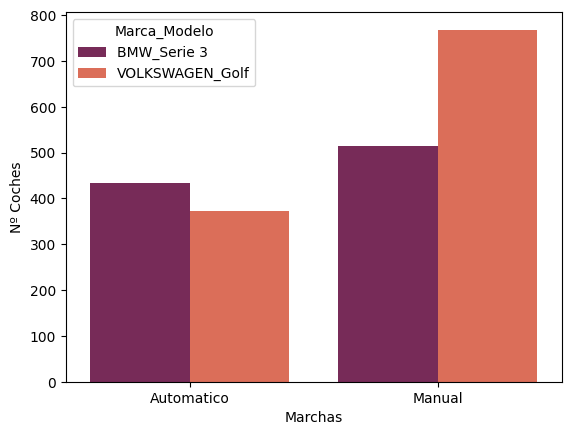

In [ ]:
sns.barplot(x='Marchas', y= 'Precio', hue='Marca_Modelo', data=df_Marchas_Count, palette= 'rocket')
plt.ylabel('Nº Coches')
plt.show()

In [ ]:
df2=df1.loc[df1.Marchas=='Manual']
df2.head(5)

,Marca,Modelo,Precio,Año,kms,CV,Puertas,Marchas,color,Provincia,Pais,Marca_Modelo
34,VOLKSWAGEN,Golf,11300,2016,77867,110.0,5,Manual,blanco,Barcelona,Spain,VOLKSWAGEN_Golf
144,BMW,Serie 3,16950,2015,85000,143.0,5,Manual,verde,Girona,Spain,BMW_Serie 3
147,VOLKSWAGEN,Golf,2900,2000,136000,105.0,3,Manual,blanco,Barcelona,Spain,VOLKSWAGEN_Golf
154,VOLKSWAGEN,Golf,15990,2018,82000,115.0,5,Manual,negro,Madrid,Spain,VOLKSWAGEN_Golf
170,BMW,Serie 3,2500,2001,283400,136.0,4,Manual,gris,GuipÃºzcoa,Spain,BMW_Serie 3


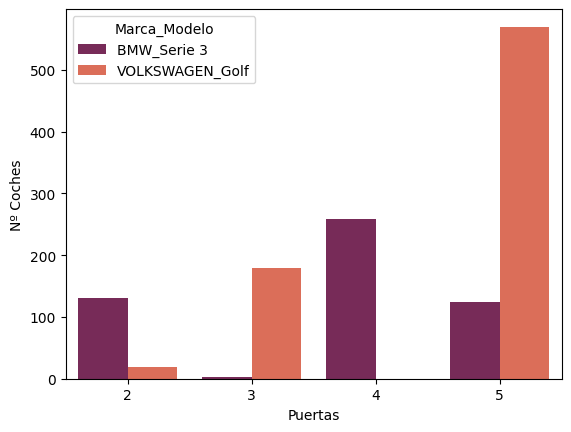

In [ ]:
df_Puertas_Count = df2.groupby(by=['Marca_Modelo', 'Puertas'], as_index=False)['Precio'].count()
sns.barplot(data=df_Puertas_Count, x='Puertas', y= 'Precio', hue='Marca_Modelo',  palette= 'rocket')
plt.ylabel('Nº Coches')
plt.show()

In [ ]:
df2 = df1.loc[df1.Marchas=='Manual']
df2.head(5)

,Marca,Modelo,Precio,Año,kms,CV,Puertas,Marchas,color,Provincia,Pais,Marca_Modelo
34,VOLKSWAGEN,Golf,11300,2016,77867,110.0,5,Manual,blanco,Barcelona,Spain,VOLKSWAGEN_Golf
144,BMW,Serie 3,16950,2015,85000,143.0,5,Manual,verde,Girona,Spain,BMW_Serie 3
147,VOLKSWAGEN,Golf,2900,2000,136000,105.0,3,Manual,blanco,Barcelona,Spain,VOLKSWAGEN_Golf
154,VOLKSWAGEN,Golf,15990,2018,82000,115.0,5,Manual,negro,Madrid,Spain,VOLKSWAGEN_Golf
170,BMW,Serie 3,2500,2001,283400,136.0,4,Manual,gris,GuipÃºzcoa,Spain,BMW_Serie 3


In [ ]:
print('Siguen quedando: ', df2.shape[0], ' Coches')

Siguen quedando:  1283  Coches


In [ ]:
pal = sns.color_palette('viridis')
pal.as_hex()[:]

['#46327e', '#365c8d', '#277f8e', '#1fa187', '#4ac16d', '#a0da39']

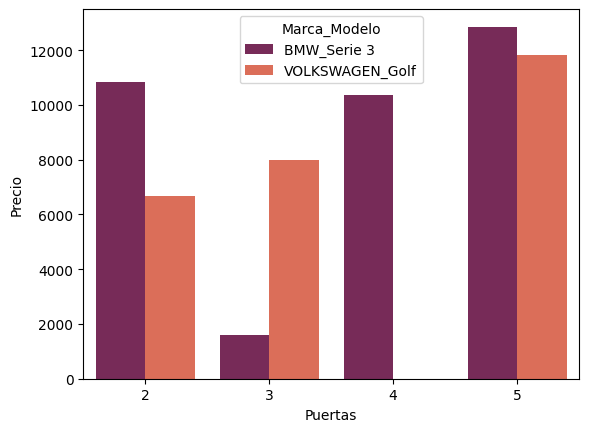

In [ ]:
df_Puertas_Precio = df2.groupby(by=['Marca_Modelo', 'Puertas'], as_index=False)['Precio'].mean()
df_Puertas_Precio['Puertas'] = df_Puertas_Precio['Puertas'].astype('category')
# plt.figure(figsize=(20,10))
sns.barplot(x='Puertas', y= 'Precio', hue='Marca_Modelo', data=df_Puertas_Precio, palette= 'rocket')
# plt.xlabel('Nº Puertas')
plt.show()

In [ ]:
df3 = df2.loc[((df2.Puertas==4)&(df2.Marca_Modelo=='BMW_Serie 3'))|((df2.Puertas==5)&(df2.Marca_Modelo=='VOLKSWAGEN_Golf'))]
print('Siguen quedando: ', df3.shape[0], ' Coches')

Siguen quedando:  828  Coches


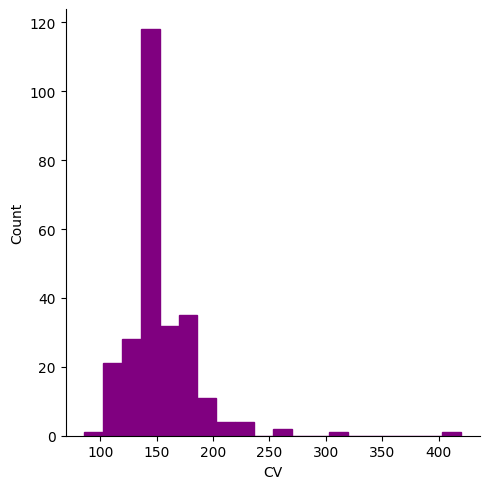

In [ ]:
bins = 20
sns.displot(df3.loc[df3['Marca_Modelo']=='BMW_Serie 3']['CV'],
            edgecolor='purple',
            facecolor='purple',
            bins=bins)

In [ ]:
df3.loc[df3['Marca_Modelo']=='BMW_Serie 3']['CV'].mode()

0    150.0
Name: CV, dtype: float64

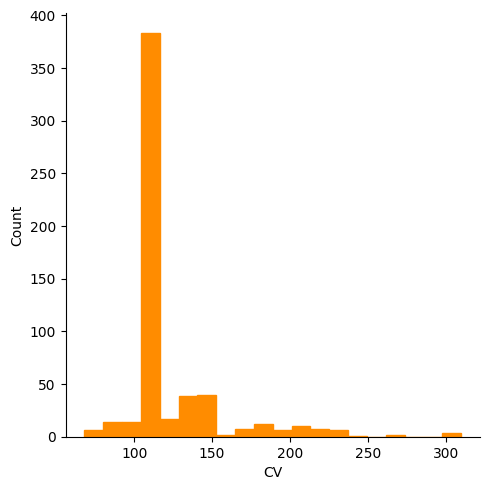

In [ ]:
bins=20
sns.displot(df3.loc[df3['Marca_Modelo']=='VOLKSWAGEN_Golf']['CV'],
            edgecolor='darkorange',
            facecolor='darkorange',
            bins=bins)

In [ ]:
df3.loc[df3['Marca_Modelo']=='VOLKSWAGEN_Golf']['CV'].mode()

0    110.0
Name: CV, dtype: float64

In [ ]:
df4 = df3.loc[((df3.CV==150)&(df3.Marca_Modelo=='BMW_Serie 3'))|((df3.CV==110)&(df3.Marca_Modelo=='VOLKSWAGEN_Golf'))]

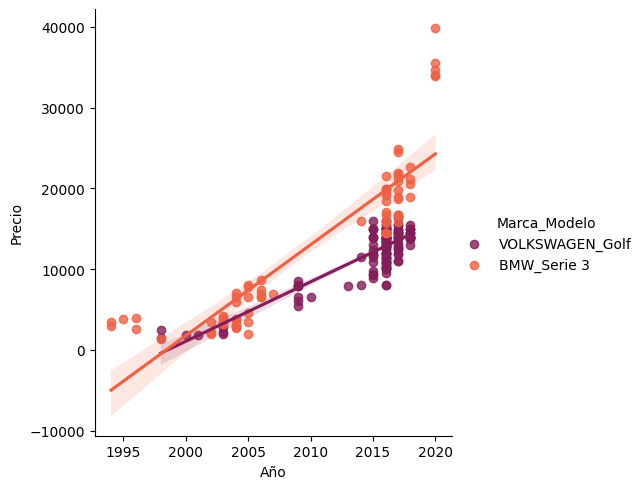

In [ ]:
df4['Año'] = df4['Año'].astype(int)
sns.lmplot(data= df4, x='Año', y='Precio', hue='Marca_Modelo', palette='rocket')

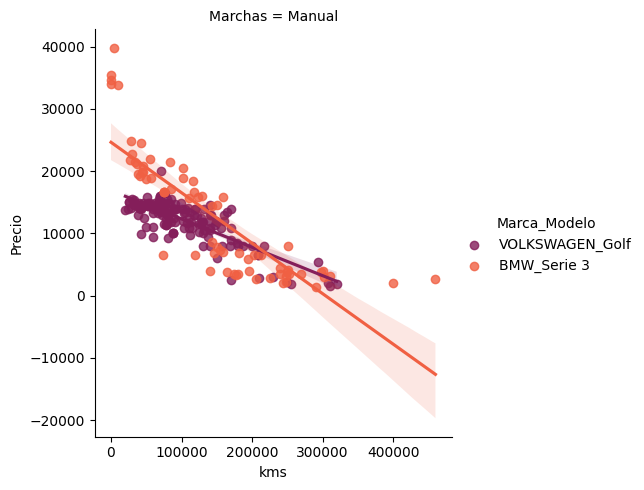

In [ ]:
sns.lmplot(data= df4, x='kms', y='Precio', hue='Marca_Modelo', col='Marchas', palette='rocket')

<Figure size 900x500 with 0 Axes>

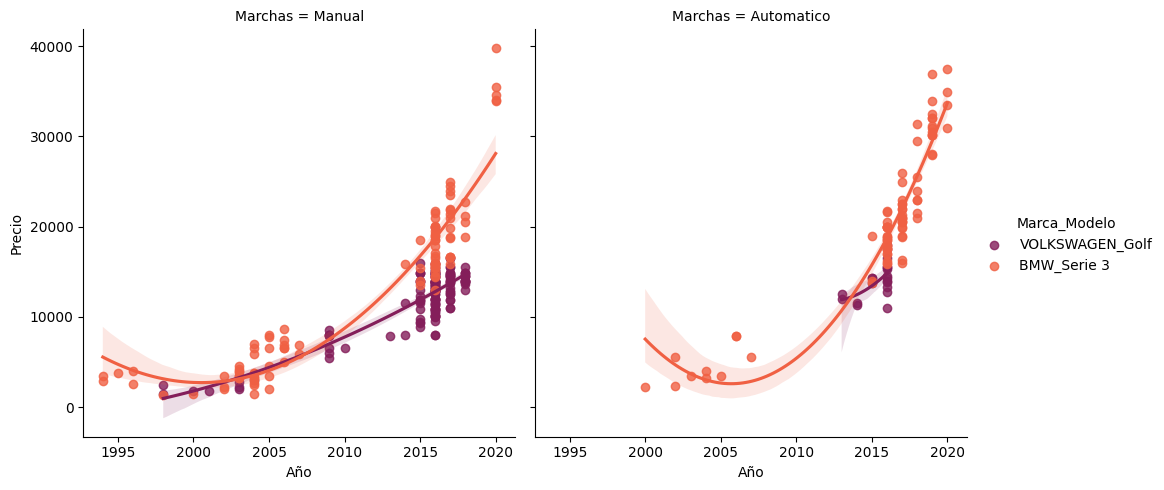

In [ ]:
df1 = df.loc[(df.Marca.isin(['VOLKSWAGEN', 'BMW']))&(df.Modelo.isin(['Golf', 'Serie 3']))] # Filtramos
df1['Marca_Modelo'] = df1['Marca'] + '_' + df1['Modelo']
df3 = df1.loc[((df1.Puertas.isin([4,5]))&(df1.Marca_Modelo=='BMW_Serie 3'))|((df1.Puertas==5)&(df1.Marca_Modelo=='VOLKSWAGEN_Golf'))]
df4 = df3.loc[((df3.CV==150)&(df3.Marca_Modelo=='BMW_Serie 3'))|((df3.CV==110)&(df3.Marca_Modelo=='VOLKSWAGEN_Golf'))]

plt.figure(figsize=(9,5))
df4['Año'] = df4['Año'].astype(int)
sns.lmplot(data= df4, x='Año', y='Precio', hue='Marca_Modelo', col='Marchas',order=2, ci=95, palette='rocket')
plt.show()